In [54]:
import requests
import pandas as pd


In [55]:
# URL de la API que quieres consultar
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

In [56]:
response = requests.get(url)


In [57]:
if response.status_code == 200:
  datos = response.json()  # Esto será un dict o una lista
  print("Datos recibidos")

Datos recibidos


In [58]:
df = pd.DataFrame(datos)
print(df.head())

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

In [59]:
print(df.info())  # Muestra nombres de columnas, cantidad de datos no nulos, y tipos de datos
print(df.head())  # Muestra las primeras filas del dataset para tener una idea general
print(df.dtypes) # Muestra los tipos de datos del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 

In [60]:
print(df.isnull().sum()) # Recuento de valores nulos por columna

customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


In [61]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,customerid,churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [62]:
#Normalizacion de datos para analisis
datos = pd.json_normalize(df["account"])
datos.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [63]:
#Normalizacion de datos para analisis
categorias = pd.json_normalize(df["customer"])
categorias.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [64]:
import numpy as np

In [65]:
col_montos = ["Charges.Monthly", "Charges.Total"]

In [66]:
#Cambio de tipo de datos para columnas de montos
datos[col_montos] = datos[col_montos].replace(' ', np.nan).astype(np.float64)

In [67]:
print(datos[col_montos].head())

   Charges.Monthly  Charges.Total
0             65.6         593.30
1             59.9         542.40
2             73.9         280.85
3             98.0        1237.85
4             83.9         267.40


In [68]:
#Columna monto diario
datos['Charges.Dayly'] = datos['Charges.Monthly'] / 30

In [69]:
print(datos[['Charges.Dayly', 'Charges.Monthly']].head())

   Charges.Dayly  Charges.Monthly
0       2.186667             65.6
1       1.996667             59.9
2       2.463333             73.9
3       3.266667             98.0
4       2.796667             83.9


In [70]:
# Media
media = datos['Charges.Dayly'].mean()
# Mediana
mediana = datos['Charges.Dayly'].median()
# Desviación estándar
desviacion = datos['Charges.Dayly'].std()

In [71]:
print(datos['Charges.Dayly'].describe())

count    7267.000000
mean        2.157337
std         1.004319
min         0.608333
25%         1.180833
50%         2.343333
75%         2.995833
max         3.958333
Name: Charges.Dayly, dtype: float64


In [72]:
import matplotlib.pyplot as plt

In [73]:
# Conteo de clientes por categoría en 'churn'
churn_counts = df['churn'].value_counts()

# Gráfico de pastel
plt.figure(figsize=(6, 6))


<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

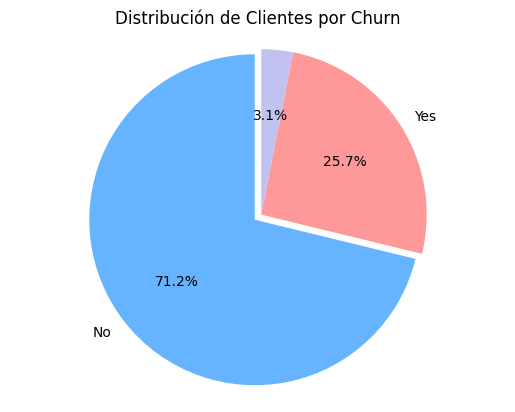

In [74]:
plt.pie(
    churn_counts,
    labels=churn_counts.index,
    autopct='%1.1f%%',  # Mostrar porcentaje con 1 decimal
    startangle=90,      # Para rotar el inicio del gráfico
    colors=['#66b3ff', '#ff9999', '#c2c2f0'],  # Added a third color
    explode=(0.05, 0, 0)   # Added a third value to match the number of categories
)

plt.title('Distribución de Clientes por Churn')
plt.axis('equal')  # Hace que el círculo sea perfecto
plt.show()

Contract
Month-to-month    5473789.50
One year          4633896.75
Two year          6440595.60
Name: Charges.Total, dtype: float64


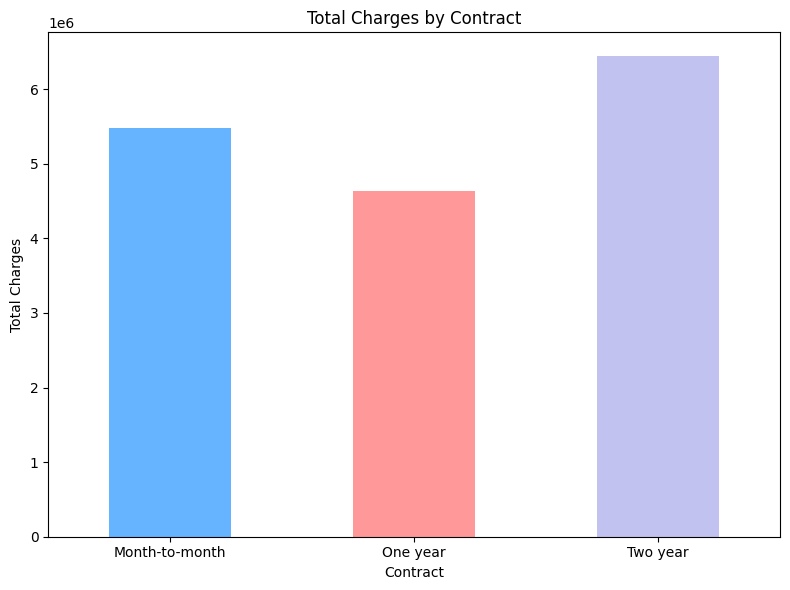

In [89]:
# Calculate the sum of 'Charges.Total' for each churn category
Contract_total_charges = combined_df.groupby('Contract')['Charges.Total'].sum()
print(Contract_total_charges)
# Create a bar plot
plt.figure(figsize=(8, 6))
Contract_total_charges.plot(kind='bar', color=['#66b3ff', '#ff9999', '#c2c2f0'])

# Add titles and labels
plt.title('Total Charges by Contract')
plt.xlabel('Contract')
plt.ylabel('Total Charges')
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the sum of 'Charges.Total' for each Contract category
churn_total_charges = combined_df.groupby('churn')['Charges.Total'].sum()
print(churn_total_charges)
# Create a bar plot
plt.figure(figsize=(8, 6))
churn_total_charges.plot(kind='bar', color=['#66b3ff', '#ff9999', '#c2c2f0'])

# Add titles and labels
plt.title('Total Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

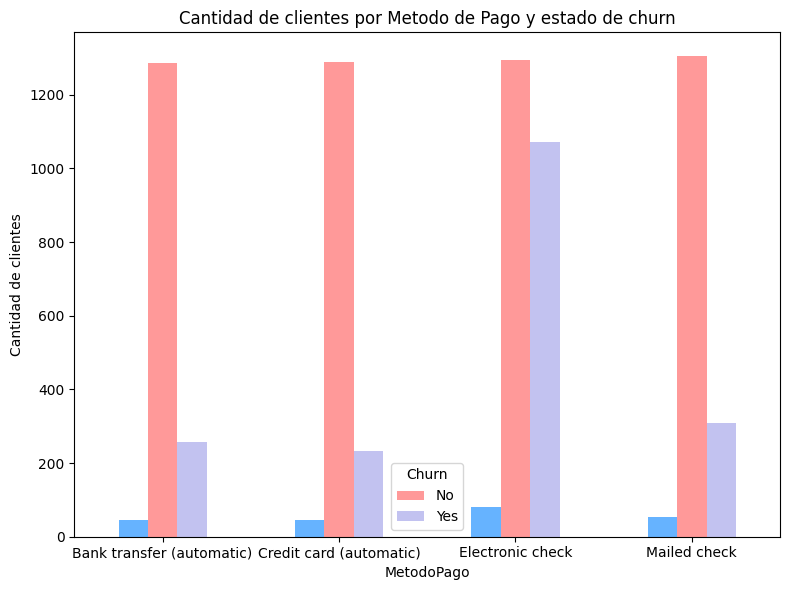

In [82]:
# grafico de barras x genero
genero_churn = combined_df.groupby(['PaymentMethod', 'churn']).size().unstack(fill_value=0)

# 2. Crear gráfico de barras
genero_churn.plot(kind='bar', figsize=(8, 6), color=['#66b3ff', '#ff9999', '#c2c2f0'])

# 3. Estética del gráfico
plt.title('Cantidad de clientes por Metodo de Pago y estado de churn')
plt.xlabel('MetodoPago')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()

# 4. Mostrar gráfico
plt.show()

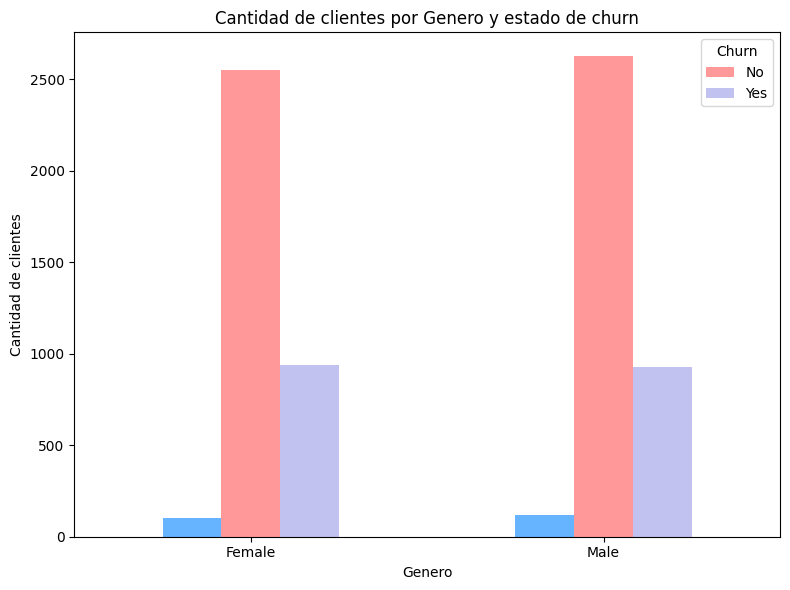

In [84]:
# grafico de barras x genero
genero_churn = combined_df.groupby(['gender', 'churn']).size().unstack(fill_value=0)

# 2. Crear gráfico de barras
genero_churn.plot(kind='bar', figsize=(8, 6), color=['#66b3ff', '#ff9999', '#c2c2f0'])

# 3. Estética del gráfico
plt.title('Cantidad de clientes por Genero y estado de churn')
plt.xlabel('Genero')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()

# 4. Mostrar gráfico
plt.show()

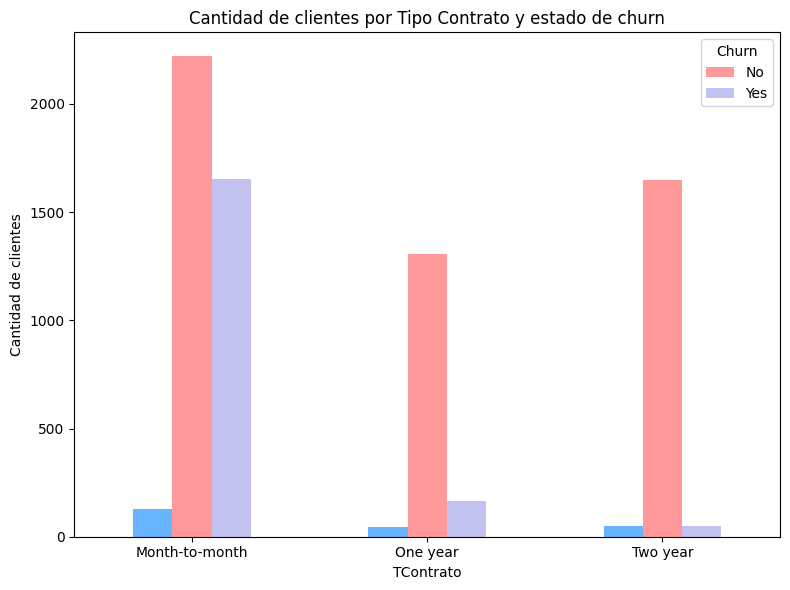

In [85]:
# grafico de barras x genero
genero_churn = combined_df.groupby(['Contract', 'churn']).size().unstack(fill_value=0)

# 2. Crear gráfico de barras
genero_churn.plot(kind='bar', figsize=(8, 6), color=['#66b3ff', '#ff9999', '#c2c2f0'])

# 3. Estética del gráfico
plt.title('Cantidad de clientes por Tipo Contrato y estado de churn')
plt.xlabel('TContrato')
plt.ylabel('Cantidad de clientes')
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()

# 4. Mostrar gráfico
plt.show()